## Trading Automatisé - Cas de Money Management

# Introduction

Dans ce projet, nous avons développé un système de trading automatisé axé sur le *Money Management*. Le chapitre 3, que vous allez découvrir dans ce dépôt, présente le cas pratique de la gestion des risques et de l’allocation optimale de capital dans un système de trading.

L’objectif principal de ce système est de déterminer la fraction optimale de capital à investir à chaque transaction en fonction des paramètres de gestion des risques, comme la taille de la position, le niveau de risque et la volatilité du marché.

# Chapitre 3 : La simulation du critère de Kelly en temps continu.

***1-INTRODUCTION***

Dans ce chapitre, nous présenterons une introduction au critère de Kelly en temps continu et ses applications en bourse. Pour simplifier cette simulation, le chapitre est divisé en quatre sections : **introduction au critère de Kelly en temps continu**, **application avec le titre du EURUSD**, et enfin, **discussion sur les problèmes et analyse plus approfondie**. Cette section se concentrera sur les principaux aspects pertinents du critère de Kelly en temps continu, dont l'objectif est de comprendre et d'appliquer ce critère en bourse. Le critère de Kelly maximise la valeur attendue du logarithme de la richesse période par période et peut être utilisé dans tout scénario où il existe une probabilité de retour ou de gain pour un investissement ou un pari donné.

*" Le critère de Kelly maximise la valeur attendue du logarithme de la richesse période par période. Et il peut être utilisé dans n'importe quel scénario où il existe une probabilité de retour/gain pour un investissement/pari donné ".*

La formule de Kelly est la suivante : 

f = (b*p-q)/b  Où :

f : La fraction optimale du capitale à risquer

b : le ratio gain/perte (le montant que l'on peut gagner divisé par le montant que l'on peut perdre).

p : la probabilité de gagner.

q : la probabilité de perdre, telle que q= 1-p

**les principaux résultats possibles de la fraction de Kelly :**

1. **Kelly positive** : Indique que la stratégie recommande d'allouer une partie du capital disponible à chaque transaction. Cela suggère un potentiel de croissance du capital à long terme lorsque la stratégie est suivie correctement.

2. **Kelly négative** : Signifie que la stratégie déconseille d'investir ou d'utiliser du levier. Cela survient lorsque les probabilités de gain sont insuffisantes par rapport aux pertes prévues, indiquant un risque élevé de perte de capital si la stratégie est appliquée.

3. **Kelly égale à zéro** : Indique que le critère de Kelly ne recommande aucun investissement. Cela peut se produire lorsque les données disponibles ne permettent pas de calculer une fraction de Kelly significative ou lorsque les conditions du marché ne justifient pas d'engager des capitaux.

**Fraction de capital à risquer** : *Le critère de Kelly recommande de risquer une fraction du capital disponible* , et non pas une quantité fixe en dollars.
Cela permet d'ajuster la taille de l'investissement en fonction de la taille totale du portefeuille. 

**2-*Hypothèses***

Par souci de simplicité, nous allons supposer ce qui suit :

1. **Premièrement, nous vivons dans un monde parfait sans commissions, sans frais de transaction ni taxes.**

Cette hypothèse suppose qu'il n'y a pas de coûts associés aux transactions financières, tels que les frais de courtage ou les taxes sur les gains en capital, l'analyse se concentre uniquement sur les résultats bruts des investissements, sans tenir compte des déductions qui diminueraient les rendements réels. Cela simplifie les calculs et permet une comparaison plus directe des stratégies d'investissement, mais cela peut conduire à des estimations optimistes des rendements dans la réalité.

2. **Deuxièmement, nous ne pouvons pas vendre à découvert.**

Cette hypothèse limite les possibilités pour les investisseurs d'exploiter les opportunités potentielles de profit dans les marchés à la baisse. La vente à découvert permet à un investisseur de vendre un actif qu'il ne détient pas encore, en espérant le racheter à un prix inférieur à l'avenir. C'est une stratégie utilisée pour profiter des marchés baissiers ou pour couvrir les positions existantes.

3. **Troisièmement, nos échanges ne modifient pas le marché**

Cette hypothèse suppose que nos transactions individuelles sont trop petites pour affecter les prix du marché.En négligeant l'impact potentiel de nos transactions sur le marché.


***3- Identification des bibliothèques***

 Avant de d'aborder notre simulation , il est essentiel d'identifier les bibliothèques que nous utiliserons dans notre analyse.


- **pandas** sous l'alias **pd**

NumPy est une bibliothèque Python utilisée pour le calcul numérique et les opérations sur les tableaux multidimensionnels

- **matplotlib.pyplot** sous l'alias **plt**

Matplotlib est une bibliothèque Python utilisée pour la création de graphiques statiques, dynamiques et interactifs.

- **MetaTrader5** sous l'alias **mt5**

MetaTrader 5 (MT5) est une plateforme de trading multi-actifs développée par MetaQuotes Software, utilisée par les traders pour accéder et trader sur divers marchés financiers, y compris le forex, les contrats à terme, les actions et les indice



In [45]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

## 2-Application pour eurusd  et US500cash




2.1. **Les données utilisées**

*Exploration des données historiques :*

Cette approche fournira une base solide pour évaluer l'efficacité du critère de Kelly et comparer ses résultats avec une stratégie d'investissement quotidienne. 


2.1.1 **EURUSD** 

L'EURUSD représente le taux de change entre l'euro (EUR) et le dollar américain (USD), indiquant combien de dollars sont nécessaires pour acheter un euro. C'est l'un des taux de change les plus négociés sur le marché des changes (Forex) et est influencé par des facteurs économiques, politiques et financiers.

In [46]:
# Connexion à MetaTrader 5
if not mt5.initialize():
    print("MetaTrader 5 n'a pas pu être démarré")
    mt5.shutdown()

# Définir le symbole et la période
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_D1  # Données journalières

# Définir la plage de dates
start_date = datetime(2020, 9, 10)
end_date = datetime(2024, 6, 29)

# Télécharger les données pour la plage de dates spécifiée
rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_date)


# Convertir en DataFrame pandas
data = pd.DataFrame(rates)
data['time'] = pd.to_datetime(data['time'], unit='s')

# Afficher les premières lignes des données
print(data)

# Sauvegarder les données dans un fichier CSV
data.to_csv('data_analyzed1.csv', index=False)

          time     open     high      low    close  tick_volume  spread  \
0   2020-09-10  1.17980  1.19164  1.17953  1.18130        41458      16   
1   2020-09-11  1.18132  1.18732  1.18093  1.18426        33659      16   
2   2020-09-14  1.18306  1.18870  1.18305  1.18606        27269      16   
3   2020-09-15  1.18593  1.18995  1.18389  1.18449        28734      16   
4   2020-09-16  1.18434  1.18815  1.17866  1.18141        36457      16   
..         ...      ...      ...      ...      ...          ...     ...   
995 2024-06-24  1.06821  1.07454  1.06793  1.07304        50885      18   
996 2024-06-25  1.07304  1.07432  1.06897  1.07130        44971      18   
997 2024-06-26  1.07127  1.07169  1.06651  1.06793        47355      18   
998 2024-06-27  1.06790  1.07255  1.06757  1.07021        56632      18   
999 2024-06-28  1.07020  1.07238  1.06844  1.07121        64229      18   

     real_volume  
0              0  
1              0  
2              0  
3              0  
4   


Les données sont stockées dans une structure de tableau DataFrame, obtenue à partir de la bibliothèque Pandas en Python. Nous avons utilisé MetaTrader (mt5) pour extraire les données historiques de cours pour la paire de devises EUR/USD, avec une fréquence quotidienne (1 jour), totalisant 1000 entrées. Les colonnes extraites incluent le temps (time), les prix d'ouverture, de haut, de bas et de clôture (open, high, low, close), le volume de ticks (tick_volume), l'écart (spread), et le volume réel (real_volume).

*Description des données :*

Les données sont stockées dans une structure de tableau DataFrame, tirée de la bibliothèque Pandas en Python. Nous avons utilisé MetaTrader (mt5) pour extraire les données historiques de cours pour la paire de devises EUR/USD, avec une fréquence quotidienne (1 jour), totalisant 1000 entrées. Voici une description des colonnes extraites :

- **time** : La date de chaque observation, initialement représentée en format entier (int64).
- **open** : Le prix d'ouverture, représenté en nombre flottant (float64).
- **high** : Le prix le plus élevé au cours de la période quotidienne, représenté en nombre flottant (float64).
- **low** : Le prix le plus bas au cours de la période quotidienne, représenté en nombre flottant (float64).
- **close** : Le prix de clôture quotidien, représenté en nombre flottant (float64).
- **tick_volume** : Le volume des ticks pour chaque jour, représenté en entier non signé de 64 bits (uint64).
- **spread** : L'écart entre les prix d'achat et de vente pour chaque jour, représenté en entier de 32 bits (int32).
- **real_volume** : Le volume réel échangé pour chaque jour, représenté en entier non signé de 64 bits (uint64).


**prétraitement**

en conservant uniquement les colonnes OHLC et en appliquant une mise en échelle Min-Max, nous simplifions notre ensemble de données et nous nous assurons qu'il est prêt pour une analyse technique efficace et une application optimale des modèles de machine learning.

In [47]:
# Extraire seulement les colonnes OHLC
data = data[['time','open', 'high', 'low', 'close']]
data_ohlc = data[['open', 'high', 'low', 'close']]

# Appliquer la mise en échelle Min-Max
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_ohlc)
scaled_data = pd.DataFrame(scaled_data, index=data_ohlc.index, columns=data_ohlc.columns)

print(data)

          time     open     high      low    close
0   2020-09-10  1.17980  1.19164  1.17953  1.18130
1   2020-09-11  1.18132  1.18732  1.18093  1.18426
2   2020-09-14  1.18306  1.18870  1.18305  1.18606
3   2020-09-15  1.18593  1.18995  1.18389  1.18449
4   2020-09-16  1.18434  1.18815  1.17866  1.18141
..         ...      ...      ...      ...      ...
995 2024-06-24  1.06821  1.07454  1.06793  1.07304
996 2024-06-25  1.07304  1.07432  1.06897  1.07130
997 2024-06-26  1.07127  1.07169  1.06651  1.06793
998 2024-06-27  1.06790  1.07255  1.06757  1.07021
999 2024-06-28  1.07020  1.07238  1.06844  1.07121

[1000 rows x 5 columns]


Ligne 1000 : win_prob=0.43, avg_win=0.0024, avg_loss=0.0027, win_loss_ratio=0.89, kelly_fraction=-0.2062
Valeur actuelle de la fraction de Kelly : -0.2062342779408552
La fraction de Kelly est négative. Il n'est pas conseillé d'investir. Le levier devrait être 0.


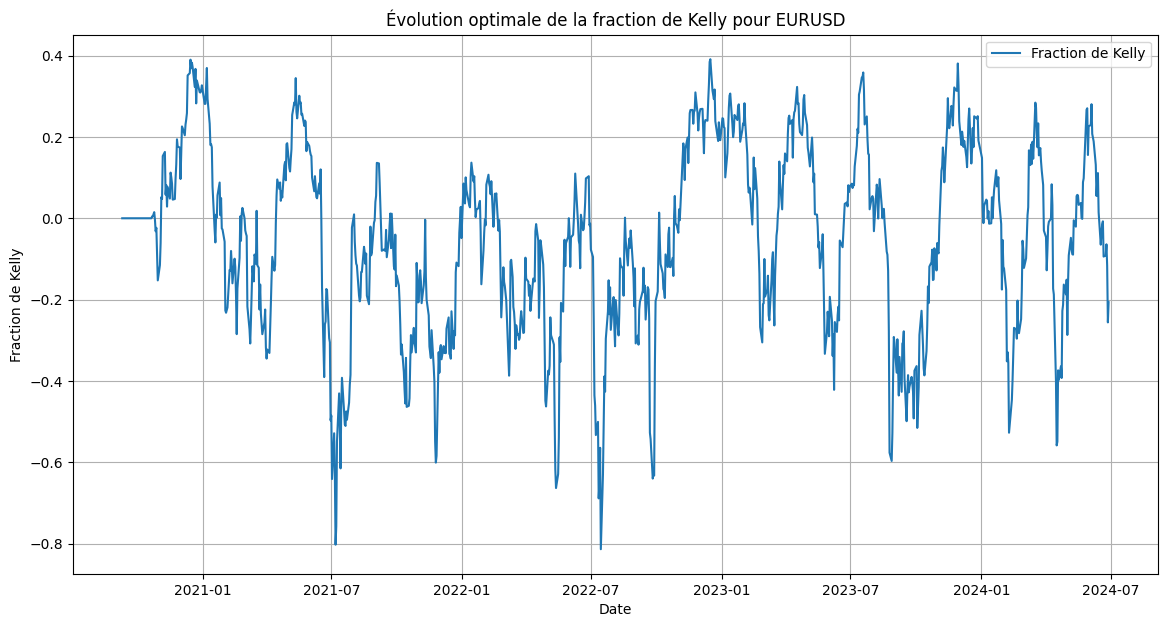

          time     open     high      low    close    Return  Kelly Fraction
0   2020-09-10  1.17980  1.19164  1.17953  1.18130       NaN        0.000000
1   2020-09-11  1.18132  1.18732  1.18093  1.18426  0.002506        0.000000
2   2020-09-14  1.18306  1.18870  1.18305  1.18606  0.001520        0.000000
3   2020-09-15  1.18593  1.18995  1.18389  1.18449 -0.001324        0.000000
4   2020-09-16  1.18434  1.18815  1.17866  1.18141 -0.002600        0.000000
..         ...      ...      ...      ...      ...       ...             ...
995 2024-06-24  1.06821  1.07454  1.06793  1.07304  0.003779       -0.091466
996 2024-06-25  1.07304  1.07432  1.06897  1.07130 -0.001622       -0.063990
997 2024-06-26  1.07127  1.07169  1.06651  1.06793 -0.003146       -0.116815
998 2024-06-27  1.06790  1.07255  1.06757  1.07021  0.002135       -0.255909
999 2024-06-28  1.07020  1.07238  1.06844  1.07121  0.000934       -0.206234

[1000 rows x 7 columns]


True

In [48]:
# Calculer les retours
data['Return'] = data['close'].pct_change()

# Fonction pour calculer la fraction de Kelly
def calculate_kelly_fraction(win_prob, win_loss_ratio):
    return (win_prob * (win_loss_ratio + 1) - 1) / win_loss_ratio

# Initialiser les paramètres de Kelly variables
rolling_window = 30  # Fenêtre de temps pour le calcul des probabilités
kelly_fractions = []

for i in range(len(data)):
    if i < rolling_window:
        kelly_fractions.append(0)  # Pas assez de données pour calculer
    else:
        window_data = data.iloc[i - rolling_window:i]
        wins = window_data[window_data['Return'] > 0]
        losses = window_data[window_data['Return'] <= 0]
        win_prob = len(wins) / rolling_window
        avg_win = wins['Return'].mean() if len(wins) > 0 else 0
        avg_loss = abs(losses['Return'].mean()) if len(losses) > 0 else 0
        win_loss_ratio = avg_win / avg_loss if avg_loss > 0 else 0
        kelly_fraction = calculate_kelly_fraction(win_prob, win_loss_ratio) if win_loss_ratio > 0 else 0
        kelly_fractions.append(kelly_fraction)
# Afficher les paramètres de Kelly
print(f"Ligne {1000} : win_prob={win_prob:.2f}, avg_win={avg_win:.4f}, avg_loss={avg_loss:.4f}, win_loss_ratio={win_loss_ratio:.2f}, kelly_fraction={kelly_fraction:.4f}")

data['Kelly Fraction'] = kelly_fractions

# Valeur actuelle de la fraction de Kelly
current_kelly_value = data['Kelly Fraction'].iloc[-1]
print(f"Valeur actuelle de la fraction de Kelly : {current_kelly_value}")

# Vérification de la valeur de Kelly pour le levier
if current_kelly_value < 0:
    print("La fraction de Kelly est négative. Il n'est pas conseillé d'investir. Le levier devrait être 0.")
else:
    # Calculer le levier recommandé si la fraction de Kelly est positive (facultatif)
    recommended_leverage = current_kelly_value  # Vous pouvez ajuster cette valeur en fonction de vos critères
    print(f"La fraction de Kelly est positive. Le levier recommandé est {recommended_leverage}.")

# Sauvegarder les données dans un fichier CSV
data.to_csv('data_analyzed1.csv', index=False)

# Graphique de l'évolution des fractions de Kelly
plt.figure(figsize=(14, 7))
plt.plot(data['time'], data['Kelly Fraction'], label='Fraction de Kelly')
plt.xlabel('Date')
plt.ylabel('Fraction de Kelly')
plt.title('Évolution optimale de la fraction de Kelly pour EURUSD')
plt.legend()
plt.grid(True)
plt.show()
print(data)
# Déconnexion de MetaTrader 5
mt5.shutdown()



D'après l'analyse du graphique *"Évolution optimale de la fraction de Kelly pour EURUSD"*, la valeur de Kelly est négative pour la paire EUR/USD, ce qui indique qu'il n'est pas conseillé d'investir dans cette paire. Cette situation suggère que toute application d'une stratégie d'investissement pourrait entraîner des pertes.

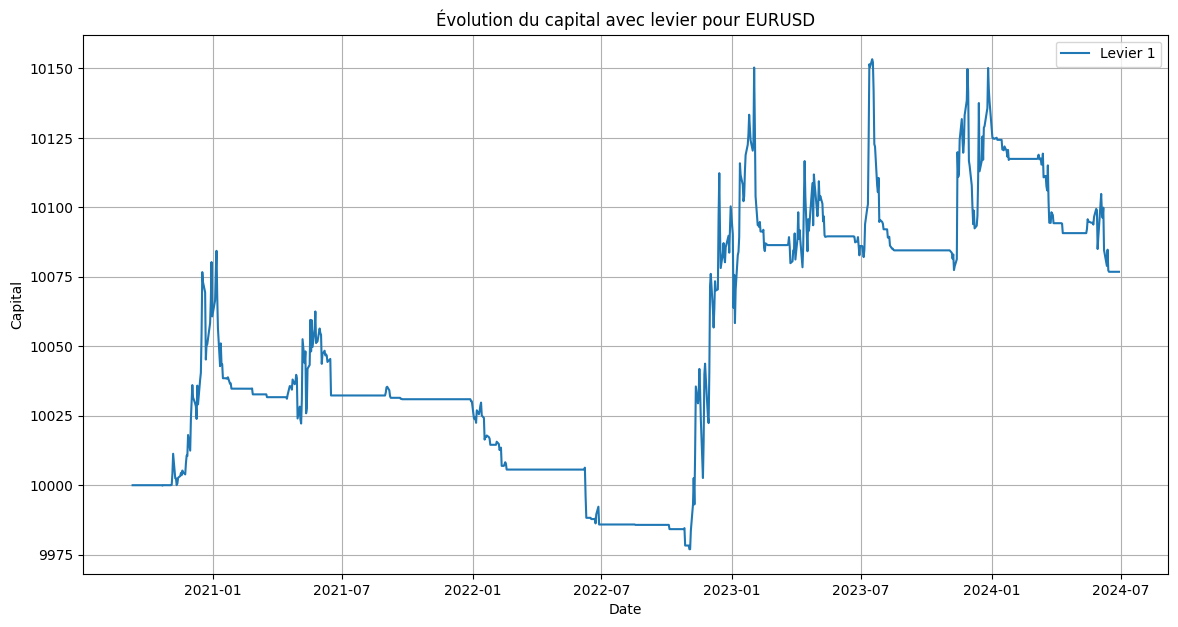

In [49]:
# Recharger les données analysées précédemment
data = pd.read_csv('data_analyzed1.csv') 

# Initialiser les capitaux
initial_capital = 10000

# Niveau de levier à appliquer
leverage = 1  # Modifiez cette valeur manuellement pour tester différents niveaux de levier
results = []

# Simulation de trading avec le niveau de levier spécifié
capital_kelly = initial_capital
capital_kelly_values = [capital_kelly]
for i in range(1, len(data)):
    trade_return = data['Return'].iloc[i]
    kelly_fraction = data['Kelly Fraction'].iloc[i]
    if kelly_fraction > 0:  # Ne pas investir si la fraction de Kelly est négative ou zéro
        trade_kelly = trade_return * kelly_fraction * leverage
        capital_kelly *= (1 + trade_kelly)
    capital_kelly_values.append(capital_kelly)
results = capital_kelly_values

# Convertir la colonne 'time' en format de date si nécessaire
data['time'] = pd.to_datetime(data['time'])

# Graphique de l'évolution du capital avec le levier spécifié
plt.figure(figsize=(14, 7))
plt.plot(data['time'], results, label=f'Levier {leverage}')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.title('Évolution du capital avec levier pour EURUSD')
plt.legend()
plt.grid(True)
plt.show()

Dans l'analyse graphique de *Lévolution du capital avec levier pour EURUSD*, une diminution observée indique une réduction substantielle des fonds investis. Cette diminution est généralement interprétée comme une perte significative de capital.

2.2 **US500cash**

L'US500Cash, ou S&P 500, est un indice boursier qui suit la performance des 500 plus grandes entreprises cotées aux États-Unis. Il est un indicateur clé de la santé économique américaine et est influencé par les résultats financiers des entreprises, les conditions économiques et les événements mondiaux

In [50]:
# Connexion à MetaTrader 5
if not mt5.initialize():
    print("MetaTrader 5 n'a pas pu être démarré")
    mt5.shutdown()

# Définir le symbole et la période
symbol = "US500Cash"
timeframe = mt5.TIMEFRAME_D1  # Données journalières

# Définir la plage de dates
start_date = datetime(2020, 8, 18)
end_date = datetime(2024, 6, 29)

# Télécharger les données pour la plage de dates spécifiée
rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_date)

# Convertir en DataFrame pandas
data = pd.DataFrame(rates)
data['time'] = pd.to_datetime(data['time'], unit='s')

# Afficher les premières lignes des données
print(data)

# Sauvegarder les données dans un fichier CSV
data.to_csv('data_analyzed2.csv', index=False)

          time     open     high      low    close  tick_volume  spread  \
0   2020-08-18  3383.28  3394.59  3369.57  3392.25        14697      70   
1   2020-08-19  3391.36  3399.32  3369.25  3372.75        14812      70   
2   2020-08-20  3372.07  3390.54  3348.57  3386.95        19110      70   
3   2020-08-21  3387.33  3399.64  3360.39  3396.10        18495      70   
4   2020-08-24  3401.89  3432.26  3397.39  3429.65        16180      70   
..         ...      ...      ...      ...      ...          ...     ...   
995 2024-06-24  5474.36  5493.53  5445.49  5450.99        31320      57   
996 2024-06-25  5452.68  5475.68  5447.21  5471.18        24967      57   
997 2024-06-26  5471.73  5488.76  5453.40  5470.61        26955      57   
998 2024-06-27  5470.72  5492.51  5453.72  5487.22        27042      57   
999 2024-06-28  5486.73  5523.02  5449.02  5470.48        32825      57   

     real_volume  
0              0  
1              0  
2              0  
3              0  
4   

Les données sont stockées dans une structure de tableau DataFrame, obtenue à partir de la bibliothèque Pandas en Python. Nous avons utilisé MetaTrader (mt5) pour extraire les données historiques des prix de l'indice US500Cash, avec une fréquence quotidienne (1 jour), totalisant 1000 entrées. Les colonnes extraites incluent le temps (time), les prix d'ouverture, de haut, de bas et de clôture (open, high, low, close), le volume de ticks (tick_volume), l'écart (spread), et le volume réel (real_volume).

Description des données :

Les données sont stockées dans une structure de tableau DataFrame, tirée de la bibliothèque Pandas en Python. Nous avons utilisé MetaTrader (mt5) pour extraire les données historiques des prix de l'indice US500Cash, avec une fréquence quotidienne (1 jour), totalisant 1000 entrées. Voici une description des colonnes extraites :

- **time** : La date de chaque observation, initialement représentée en format entier (int64).
- **open** : Le prix d'ouverture, représenté en nombre flottant (float64).
- **high** : Le prix le plus élevé au cours de la période quotidienne, représenté en nombre flottant (float64).
- **low** : Le prix le plus bas au cours de la période quotidienne, représenté en nombre flottant (float64).
- **close** : Le prix de clôture quotidien, représenté en nombre flottant (float64).
- **tick_volume** : Le volume des ticks pour chaque jour, représenté en entier non signé de 64 bits (uint64).
- **spread** : L'écart entre les prix d'achat et de vente pour chaque jour, représenté en entier de 32 bits (int32).
- **real_volume** : Le volume réel échangé pour chaque jour, représenté en entier non signé de 64 bits (uint64).

**Prétraitement**

In [51]:
# Extraire seulement les colonnes OHLC
data = data[['time','open', 'high', 'low', 'close']]
data_ohlc = data[['open', 'high', 'low', 'close']]


# Appliquer la mise en échelle Min-Max
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_ohlc)
scaled_data = pd.DataFrame(scaled_data, index=data_ohlc.index, columns=data_ohlc.columns)

print(data)

          time     open     high      low    close
0   2020-08-18  3383.28  3394.59  3369.57  3392.25
1   2020-08-19  3391.36  3399.32  3369.25  3372.75
2   2020-08-20  3372.07  3390.54  3348.57  3386.95
3   2020-08-21  3387.33  3399.64  3360.39  3396.10
4   2020-08-24  3401.89  3432.26  3397.39  3429.65
..         ...      ...      ...      ...      ...
995 2024-06-24  5474.36  5493.53  5445.49  5450.99
996 2024-06-25  5452.68  5475.68  5447.21  5471.18
997 2024-06-26  5471.73  5488.76  5453.40  5470.61
998 2024-06-27  5470.72  5492.51  5453.72  5487.22
999 2024-06-28  5486.73  5523.02  5449.02  5470.48

[1000 rows x 5 columns]


Analyse

Ligne 1000 : win_prob=0.57, avg_win=0.0043, avg_loss=0.0028, win_loss_ratio=1.53, kelly_fraction=0.2834
Valeur actuelle de la fraction de Kelly : 0.2833751063303045
La fraction de Kelly est positive. Le levier recommandé est 0.2833751063303045.


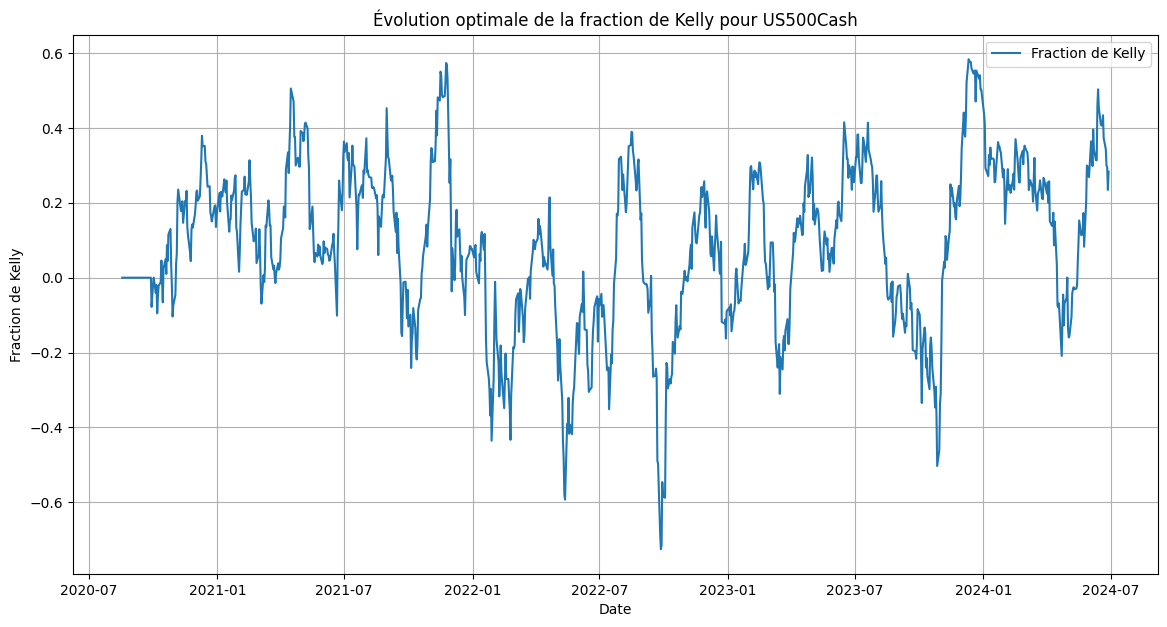

          time     open     high      low    close    Return  Kelly Fraction
0   2020-08-18  3383.28  3394.59  3369.57  3392.25       NaN        0.000000
1   2020-08-19  3391.36  3399.32  3369.25  3372.75 -0.005748        0.000000
2   2020-08-20  3372.07  3390.54  3348.57  3386.95  0.004210        0.000000
3   2020-08-21  3387.33  3399.64  3360.39  3396.10  0.002702        0.000000
4   2020-08-24  3401.89  3432.26  3397.39  3429.65  0.009879        0.000000
..         ...      ...      ...      ...      ...       ...             ...
995 2024-06-24  5474.36  5493.53  5445.49  5450.99 -0.003344        0.343921
996 2024-06-25  5452.68  5475.68  5447.21  5471.18  0.003704        0.299643
997 2024-06-26  5471.73  5488.76  5453.40  5470.61 -0.000104        0.295247
998 2024-06-27  5470.72  5492.51  5453.72  5487.22  0.003036        0.234543
999 2024-06-28  5486.73  5523.02  5449.02  5470.48 -0.003051        0.283375

[1000 rows x 7 columns]


In [52]:
# Calculer les retours
data['Return'] = data['close'].pct_change()
# Fonction pour calculer la fraction de Kelly
def calculate_kelly_fraction(win_prob, win_loss_ratio):
    return (win_prob * (win_loss_ratio + 1) - 1) / win_loss_ratio
# Initialiser les paramètres de Kelly variables
rolling_window = 30  # Fenêtre de temps pour le calcul des probabilités
kelly_fractions = []
for i in range(len(data)):
    if i < rolling_window:
        kelly_fractions.append(0)  # Pas assez de données pour calculer
    else:
        window_data = data.iloc[i - rolling_window:i]
        wins = window_data[window_data['Return'] > 0]
        losses = window_data[window_data['Return'] <= 0]
        win_prob = len(wins) / rolling_window
        avg_win = wins['Return'].mean() if len(wins) > 0 else 0
        avg_loss = abs(losses['Return'].mean()) if len(losses) > 0 else 0
        win_loss_ratio = avg_win / avg_loss if avg_loss > 0 else 0
        kelly_fraction = calculate_kelly_fraction(win_prob, win_loss_ratio) if win_loss_ratio > 0 else 0
        kelly_fractions.append(kelly_fraction)
# Afficher les paramètres de Kelly
print(f"Ligne {1000} : win_prob={win_prob:.2f}, avg_win={avg_win:.4f}, avg_loss={avg_loss:.4f}, win_loss_ratio={win_loss_ratio:.2f}, kelly_fraction={kelly_fraction:.4f}")
data['Kelly Fraction'] = kelly_fractions
# Valeur actuelle de la fraction de Kelly
current_kelly_value = data['Kelly Fraction'].iloc[-1]
print(f"Valeur actuelle de la fraction de Kelly : {current_kelly_value}")
# Vérification de la valeur de Kelly pour le levier
if current_kelly_value < 0:
    print("La fraction de Kelly est négative. Il n'est pas conseillé d'investir. Le levier devrait être 0.")
else:
    # Calculer le levier recommandé si la fraction de Kelly est positive (facultatif)
    recommended_leverage = current_kelly_value  # Vous pouvez ajuster cette valeur en fonction de vos critères
    print(f"La fraction de Kelly est positive. Le levier recommandé est {recommended_leverage}.")
# Sauvegarder les données dans un fichier CSV
data.to_csv('data_analyzed2.csv', index=False)
# Graphique de l'évolution des fractions de Kelly
plt.figure(figsize=(14, 7))
plt.plot(data['time'], data['Kelly Fraction'], label='Fraction de Kelly')
plt.xlabel('Date')
plt.ylabel('Fraction de Kelly')
plt.title('Évolution optimale de la fraction de Kelly pour US500Cash')
plt.legend()
plt.grid(True)
plt.show()
# Déconnexion de MetaTrader 5
mt5.shutdown()
print(data)

D'après l'analyse du graphique "Évolution optimale de la fraction de Kelly pour US500Cash", la valeur de Kelly est positive pour l'indice US500Cash, ce qui indique qu'il est conseillé d'investir dans cet indice. Cette situation suggère que l'application d'une stratégie d'investissement pourrait entraîner des gains

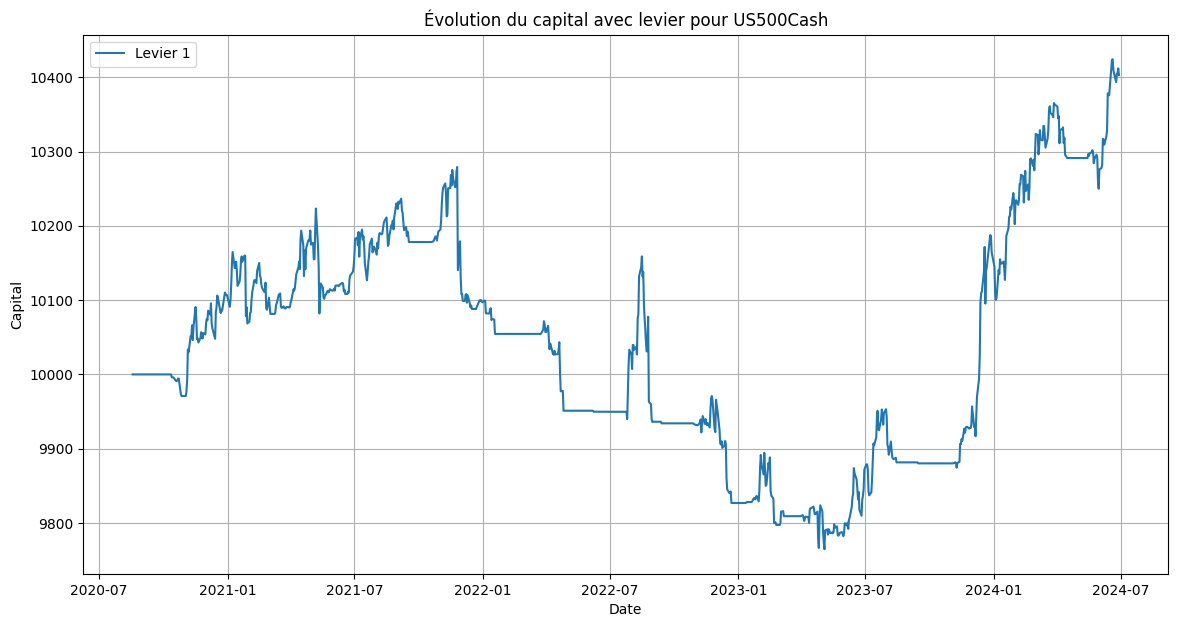

In [53]:
# Recharger les données analysées précédemment
data = pd.read_csv('data_analyzed2.csv') 

# Initialiser les capitaux
initial_capital = 10000

# Niveau de levier à appliquer
leverage = 1  # Modifiez cette valeur manuellement pour tester différents niveaux de levier
results = []

# Simulation de trading avec le niveau de levier spécifié
capital_kelly = initial_capital
capital_kelly_values = [capital_kelly]
for i in range(1, len(data)):
    trade_return = data['Return'].iloc[i]
    kelly_fraction = data['Kelly Fraction'].iloc[i]
    if kelly_fraction > 0:  # Ne pas investir si la fraction de Kelly est négative ou zéro
        trade_kelly = trade_return * kelly_fraction * leverage
        capital_kelly *= (1 + trade_kelly)
    capital_kelly_values.append(capital_kelly)
results = capital_kelly_values

# Convertir la colonne 'time' en format de date si nécessaire
data['time'] = pd.to_datetime(data['time'])

# Graphique de l'évolution du capital avec le levier spécifié
plt.figure(figsize=(14, 7))
plt.plot(data['time'], results, label=f'Levier {leverage}')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.title('Évolution du capital avec levier pour US500Cash')
plt.legend()
plt.grid(True)
plt.show()


L'analyse graphique de L'évolution du capital avec levier pour US500Cash montre une augmentation significative des fonds investis. Cette hausse est généralement interprétée comme un gain substantiel de capital.

**Discussion sur les problèmes et analyse plus approfondie**

#### Titre EURUSD

1. **Détection des Risques de manière Efficace** : Les simulations ont montré que, pour le titre EURUSD, la valeur du critère de Kelly est négative. Cela indique que, selon le critère de Kelly, il n'est pas optimal de risquer une partie du capital sur cet investissement. Cette détection efficace des risques permet d'éviter des pertes potentielles dans un marché où les probabilités de gain ne sont pas suffisantes pour justifier l'investissement.

2. **Recommandation de Non-Investissement** : Une valeur négative du critère de Kelly suggère que la stratégie recommande de ne pas allouer de capital à ce titre. Cela peut survenir lorsque les probabilités de gain sont trop faibles par rapport aux pertes attendues, ce qui indique un risque élevé de perte de capital.

#### Indice US500Cash

1. **Optimisation du Capital Investi** : Pour l'indice US500Cash, la valeur du critère de Kelly est positive. Cela indique qu'il est optimal de risquer une fraction spécifique du capital sur cet investissement. Une valeur positive suggère un potentiel de croissance du capital à long terme, lorsque la stratégie est suivie correctement.

2. **Allocation de Capital** : Une valeur positive du critère de Kelly recommande d'allouer une partie du capital disponible à chaque transaction, ce qui favorise une croissance stable et durable du capital investi. Cela montre que, pour l'US500Cash, les probabilités de gain sont suffisamment élevées pour justifier l'investissement.

### Conclusion Générale

1. **Titre EURUSD** : La détection des risques grâce au critère de Kelly a montré que l'investissement dans le titre EURUSD n'est pas recommandé, en raison d'une valeur de Kelly négative. Cela souligne l'importance de l'utilisation du critère de Kelly pour éviter des investissements risqués et potentiellement non rentables.

2. **Indice US500Cash** : L'application du critère de Kelly a révélé une valeur positive, indiquant un potentiel d'investissement favorable. Les investisseurs peuvent ainsi allouer une fraction optimale de leur capital pour maximiser les gains tout en gérant les risques de manière efficace.

## Conclusion

Les études sur le titre EURUSD et l'indice US500Cash confirment que le critère de Kelly en temps continu est un outil puissant pour maximiser la croissance du capital tout en gérant les risques de manière efficace. Cependant, son succès repose sur des estimations probabilistes précises et une compréhension approfondie des conditions du marché. Les investisseurs doivent appliquer ce critère avec prudence et en complément d'autres analyses de marché pour prendre des décisions d'investissement bien informées et adaptatives.